In [1]:
import os
import matplotlib.pyplot as plt

In [2]:
def count_numeric_subfolders(folder_path):
    if not os.path.exists(folder_path):
        raise FileNotFoundError(f"エラー: 指定されたパスが見つかりません: {folder_path}")
    if not os.path.isdir(folder_path):
        raise NotADirectoryError(f"エラー: 指定されたパスはフォルダではありません: {folder_path}")
    numeric_folder_count = 0
    for item in os.listdir(folder_path):
        item_path = os.path.join(folder_path, item)
        if os.path.isdir(item_path) and item.isdigit():
            numeric_folder_count += 1
    return numeric_folder_count

In [3]:
def filter_co_occur(data, sample_name, data_len, max_co_occur, out_num):
    filted_data = []
    filted_sample_name = []
    filted_data_len = []
    for i in range(len(data)):
        compare = 0
        for j in range(len(data[i])):
            mutation = data[i][j].split(',')
            if compare < len(mutation):
                compare = len(mutation)
        if compare <= max_co_occur:
            filted_data.append(data[i])
            filted_sample_name.append(sample_name[i])
            filted_data_len.append(data_len[i])
        if len(filted_data) >= out_num:
            break
    return filted_data, filted_sample_name, filted_data_len

In [4]:
def import_mutation_paths(base_dir, strain):
    """
    指定されたstrainディレクトリからmutation_paths_"strain".tsvを読み込む。

    Parameters:
        base_dir (str): ベースディレクトリのパス。
        strain (str): 読み込み対象のstrain名。

    Returns:
        list: 読み込んだTSVファイルのパスのリスト。
    """
    # ホームディレクトリを展開
    base_dir = os.path.expanduser(base_dir)
    strain_dir = os.path.join(base_dir, strain)

    # strain直下のファイルパスを確認
    file_paths = []
    file_path = os.path.join(strain_dir, f"mutation_paths_{strain}.tsv")
    if os.path.exists(file_path):
        file_paths.append(file_path)
    
    # strain/numサブディレクトリを探索
    else:
        if os.path.exists(strain_dir) and os.path.isdir(strain_dir):
            num_dirs = [d for d in os.listdir(strain_dir) if d.isdigit()]
            num_dirs.sort(key=int)  # 数字順にソート

            for num in num_dirs:
                file_path = os.path.join(strain_dir, num, f"mutation_paths_{strain}.tsv")
                if os.path.exists(file_path):
                    file_paths.append(file_path)

    if not file_paths:
        raise FileNotFoundError(f"mutation_paths_{strain}.tsvが{strain_dir}内に見つかりませんでした。")

    return file_paths


In [6]:
if __name__ == "__main__":
    # --- データ読み込み・前処理 ---
    strains = ['B.1.1.7','P.1','BA.2','BA.1.1','BA.1','B.1.617.2','B.1.351','B.1.1.529']
    #strains = ['P.1']
    out_num = 1000000
    dir = '../usher_output/'
    max_co_occur = 5

    # 全件データの読み込み
    names = []
    lengths = []
    paths = []
    for strain in strains:
        file_paths = import_mutation_paths(dir,strain)
        for file_path in file_paths:
            print(f"[INFO]import: {file_path}")
            f = open(file_path, 'r',encoding="utf-8_sig")
            datalist = f.readlines()
            f.close()
            for i in range(1,len(datalist)):
                data = datalist[i].split('\t')
                names.append(data[0])
                lengths.append(int(data[1]))
                paths.append(data[2].rstrip().split('>'))
        
    print(f"[INFO] 全件読み込み完了: {len(paths)} サンプル")
    #filtered_paths, filtered_name, filtered_length = filter_co_occur(paths, names, lengths, max_co_occur, out_num)
    #print(f"[INFO] 共起数フィルタリング完了: {len(filtered_paths)} サンプル")
    max_timestep=max(lengths)

[INFO]import: ../usher_output/B.1.1.7/0/mutation_paths_B.1.1.7.tsv
[INFO]import: ../usher_output/B.1.1.7/1/mutation_paths_B.1.1.7.tsv
[INFO]import: ../usher_output/B.1.1.7/2/mutation_paths_B.1.1.7.tsv
[INFO]import: ../usher_output/B.1.1.7/3/mutation_paths_B.1.1.7.tsv
[INFO]import: ../usher_output/B.1.1.7/4/mutation_paths_B.1.1.7.tsv
[INFO]import: ../usher_output/B.1.1.7/5/mutation_paths_B.1.1.7.tsv
[INFO]import: ../usher_output/B.1.1.7/6/mutation_paths_B.1.1.7.tsv
[INFO]import: ../usher_output/B.1.1.7/7/mutation_paths_B.1.1.7.tsv
[INFO]import: ../usher_output/B.1.1.7/8/mutation_paths_B.1.1.7.tsv
[INFO]import: ../usher_output/B.1.1.7/9/mutation_paths_B.1.1.7.tsv
[INFO]import: ../usher_output/B.1.1.7/10/mutation_paths_B.1.1.7.tsv
[INFO]import: ../usher_output/B.1.1.7/11/mutation_paths_B.1.1.7.tsv
[INFO]import: ../usher_output/B.1.1.7/12/mutation_paths_B.1.1.7.tsv
[INFO]import: ../usher_output/B.1.1.7/13/mutation_paths_B.1.1.7.tsv
[INFO]import: ../usher_output/B.1.1.7/14/mutation_paths_B.

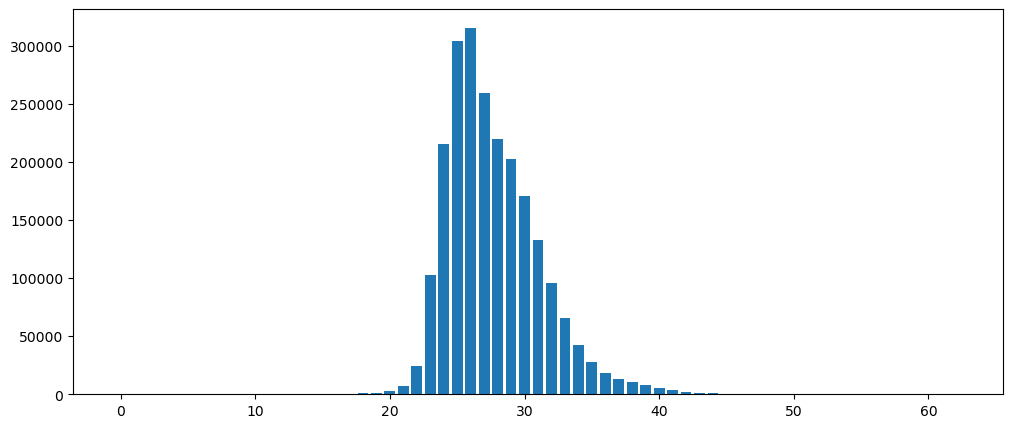

13 6
14 4
15 17
16 258
17 336
18 715
19 1259
20 2412
21 7259
22 24050
23 102747
24 215584
25 304535
26 315907
27 259700
28 219665
29 202445
30 170580
31 132872
32 95828
33 65866
34 42853
35 27571
36 18690
37 13449
38 10232
39 7761
40 5251
41 3455
42 2058
43 1249
44 842
45 559
46 276
47 151
48 100
49 54
50 19
51 24
52 16
53 7
54 6
55 9
56 5
57 2
58 3
59 4
60 3
61 2
62 4


In [8]:
length_count = []
length_i = []
for i in range(0,max(lengths)):
    length_count.append(lengths.count(i))
    length_i.append(i)
plt.figure(figsize=[12,5])
plt.bar(length_i,length_count)
plt.xticks()
plt.show()

for i in length_i:
    if(length_count[i] != 0):
        print(i,length_count[i])

In [9]:
co_occur = []
co_occur_length = []
max_num = 1
max_i = 0
for i in range(len(paths)):
    #print(name[i],mutation_paths[i])
    temp = []
    for j in range(len(paths[i])):
        mutation = paths[i][j].split(',')
        if(len(mutation)>1):
            #print(mutation)
            if(max_num<len(mutation)):
                max_num = len(mutation)
                max_i = i
                print(max_num,max_i)
            temp.append(mutation)
            co_occur_length.append(len(mutation))
    co_occur.append(temp)

2 0
4 0
5 0
7 24
13 187
15 1481
16 3802
24 12318
31 64369
42 90771
80 409600
90 1926795
123 2017969


In [10]:
length_count = []
length_i = []
for i in range(2,max_num+1):
    length_count.append(co_occur_length.count(i))
    length_i.append(i)
    if(length_count[i-2]!=0):
        print(length_i[i-2],',',length_count[i-2])

2 , 7515225
3 , 5955462
4 , 1779320
5 , 1868042
6 , 543025
7 , 5638
8 , 32734
9 , 1567584
10 , 60484
11 , 236651
12 , 598
13 , 489
14 , 58996
15 , 186
16 , 107
17 , 111
18 , 1457785
19 , 90
20 , 49
21 , 52
22 , 30
23 , 26
24 , 28
25 , 25
26 , 20
27 , 24
28 , 12
29 , 9
30 , 9
31 , 22
32 , 15
33 , 7
34 , 10
35 , 8
36 , 5
37 , 5
38 , 2
39 , 9
40 , 5
41 , 3
42 , 7
43 , 1
44 , 2
45 , 6
46 , 1
47 , 2
49 , 3
50 , 3
51 , 2
53 , 2
54 , 1
55 , 2
57 , 3
59 , 1
61 , 2
63 , 1
67 , 2
70 , 2
71 , 1
73 , 1
76 , 1
80 , 1
90 , 1
96 , 1
123 , 1


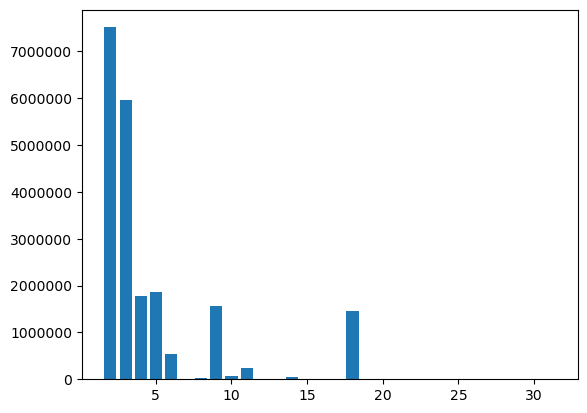

In [11]:
plt.bar(length_i[0:30],length_count[0:30])
plt.xticks()
plt.ticklabel_format(style='plain')
plt.show()